In [13]:
import tensorflow as tf
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

In [2]:
def rbf_kernel(a, b, gamma=0.1):
    return gamma * tf.norm(a-b)**2

In [26]:
num_predictors = 2
num_samples = 50

labels = np.zeros((num_samples), np.float32)
inputs = np.zeros((num_samples, num_predictors), np.float32)

max_coord = 10

for i in range(num_samples):
    x = np.random.randint(-max_coord, max_coord+1, (2))
    y = 1 if np.prod(x) >= 0 else -1
    inputs[i] = x
    labels[i] = y

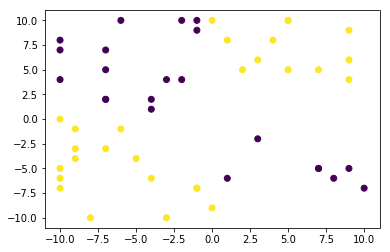

In [27]:
plt.scatter(inputs[:, 0], inputs[:, 1], c= labels)
plt.show()

In [46]:
def rbf_kernel(a, b, gamma=0.1, norm_func=tf.norm):
    return gamma * norm_func(a-b)**2

In [61]:
tf.reset_default_graph()
num_training = 30
train_inputs = inputs[:num_training]
train_labels = inputs[:num_training]

kernel_matrix = np.zeros((num_training, num_training), np.float32)
for i in range(num_training):
    for j in range(num_training):
        kernel_matrix[i, j] = rbf_kernel(train_inputs[i], train_inputs[j], norm_func=np.linalg.norm)


pl_infer = tf.placeholder(tf.float32, [num_predictors])

weight = tf.get_variable("weight", [num_training])
bias = 0

decision_func = bias + tf.reduce_sum(
        weight * tf.map_fn(
                            lambda sample: rbf_kernel(pl_infer, sample),
                            train_inputs
        )
)

objective = (1/2)*tf.tensordot( tf.tensordot(weight, kernel_matrix, axes=1), weight, axes=1)
objective -= tf.reduce_sum(weight * pl_labels)

train_op = tf.train.AdamOptimizer().minimize(objective)



ValueError: Tensor("Placeholder_51:0", shape=(30, 1), dtype=float32) must be from the same graph as Tensor("weight/read:0", shape=(30,), dtype=float32).

In [58]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    while True:
        [loss, _] = sess.run([objective, train_op])
        print("loss =", loss)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_51' with dtype float and shape [30,1]
	 [[node Placeholder_51 (defined at <ipython-input-52-e7a76da6cc80>:12)  = Placeholder[dtype=DT_FLOAT, shape=[30,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_51', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/elmines/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/elmines/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/elmines/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/elmines/.local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1440, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/elmines/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/elmines/.local/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/elmines/.local/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/elmines/.local/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/elmines/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/elmines/.local/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/elmines/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/elmines/.local/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/elmines/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/elmines/.local/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/elmines/.local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/elmines/.local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/elmines/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/elmines/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/elmines/.local/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/elmines/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/elmines/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/elmines/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-e7a76da6cc80>", line 12, in <module>
    pl_labels = tf.placeholder(tf.float32, [num_training, 1])
  File "/home/elmines/.local/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1747, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/elmines/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 5206, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/elmines/.local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/elmines/.local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/elmines/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/elmines/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_51' with dtype float and shape [30,1]
	 [[node Placeholder_51 (defined at <ipython-input-52-e7a76da6cc80>:12)  = Placeholder[dtype=DT_FLOAT, shape=[30,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
